#### Import Python modules necessary for qualitative analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from dython.nominal import associations
from collections import Counter
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import re
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

from subprocess import check_output
%config Completer.use_jedi = False

%load_ext watermark
%watermark --iversions

re        : 2.2.1
numpy     : 1.24.3
seaborn   : 0.12.2
nltk      : 3.8.1
matplotlib: 3.7.4
pandas    : 1.5.3



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/laklevi1/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/laklevi1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/laklevi1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


* Load the Excel data into a Pandas DataFrame

In [26]:
df = pd.read_excel('CSIR-CRISurveyResponses.xlsx')
df.head()

Timestamp                Email address  \
0 2023-10-10 17:25:21.928           mdasante@gmail.com   
1 2023-11-09 09:53:06.331    degreatdebrahgh@gmail.com   
2 2023-11-09 09:59:40.323  bernard.sakyiamah@gmail.com   
3 2023-11-09 10:08:06.217     felix.frimpong@yahoo.com   
4 2023-11-09 10:21:18.825       ppacheampong@gmail.com   

                                             Consent  \
0  I agree with these terms and wish to take part...   
1  I agree with these terms and wish to take part...   
2  I agree with these terms and wish to take part...   
3  I agree with these terms and wish to take part...   
4  I agree with these terms and wish to take part...   

  Q1. How do you collect your research data?  (pick all options that are applicable)  \
0  Handhelds (Phone or Tablet), Online Data manag...                                   
1  Paper notes, Handhelds (Phone or Tablet), Exce...                                   
2         Online Data manager (eg breeding platform)                                   
3  Paper notes, Handhelds (Phone or Tablet), Exce...                                   
4           Paper notes, Handhelds (Phone or Tablet)                                   

   Q2. How do you store your research data? (pick all options that are applicable)  \
0  Own laptop, Report compiled at the end of the ...                                 
1                        Paper in office, Own laptop                                 
2                                         Own laptop                                 
3  Paper in office, Own laptop, Report compiled a...                                 
4  Own laptop, Report compiled at the end of the ...                                 

  Q3. Where do you think your research data should be stored? (Free text)    \
0                          Institutional repository                           
1                                   Designated Cloud                          
2                                       On the cloud                          
3                           Institutional repository                          
4                            Institional repository                           

  Q4. What challenges do you experience with respect to accessing and handling research data? (Free text)   \
0  lost data from retired scientist , difficulty ...                                                         
1  Not available from Technician and its presenta...                                                         
2                                    Corrupted files                                                         
3  none except for accessing historical data on a...                                                         
4      Difficult access if you are not the generator                                                         

  Q5. What kind of support would be most helpful to help you manage and analyse your data? (Free text)   \
0  Easy to use Institutional repository, equipmen...                                                      
1  Data collected on tablets and sent directly to...                                                      
2            Cloud storage and ease of accessibility                                                      
3  Institutional repository, training on data man...                                                      
4                              Software  , computer                                                       

  Q6. How easy is it to get access to your own historical data? Explain your answer (Please include possible examples)  \
0  Histortial data which was stored on my laptop ...                                                                     
1  No easy, how they are kept in documents and re...                                                                     
2                                        Not so easy                                                                     
3  usually i have

* check column names

In [3]:

df.columns

Index(['Timestamp', 'Email address', 'Consent',
       'Q1. How do you collect your research data?  (pick all options that are applicable)',
       ' Q2. How do you store your research data? (pick all options that are applicable)',
       'Q3. Where do you think your research data should be stored? (Free text)  ',
       'Q4. What challenges do you experience with respect to accessing and handling research data? (Free text) ',
       'Q5. What kind of support would be most helpful to help you manage and analyse your data? (Free text) ',
       'Q6. How easy is it to get access to your own historical data? Explain your answer (Please include possible examples)',
       'Q7. How easy is it to get access to historical data produced by other scientists? Explain your answer. (Please include possible examples)',
       'Q8. Do you have any anxiety about centralized and Institutional-level managed data storage? Explain your answer.',
       'Q9. Would you be interested in getting training in 

* Drop the specific columns that won't help so in the qualitative analysis

In [27]:
df.drop(columns=['Timestamp',
                 'Email address',
                 'Consent',
                  'Other (specify)',
                 'Other (specify).1',
                 'Other (specify).2',
                 'Other (specify).3'], 
                 inplace=True)
df.head()

Q1. How do you collect your research data?  (pick all options that are applicable)  \
0  Handhelds (Phone or Tablet), Online Data manag...                                   
1  Paper notes, Handhelds (Phone or Tablet), Exce...                                   
2         Online Data manager (eg breeding platform)                                   
3  Paper notes, Handhelds (Phone or Tablet), Exce...                                   
4           Paper notes, Handhelds (Phone or Tablet)                                   

   Q2. How do you store your research data? (pick all options that are applicable)  \
0  Own laptop, Report compiled at the end of the ...                                 
1                        Paper in office, Own laptop                                 
2                                         Own laptop                                 
3  Paper in office, Own laptop, Report compiled a...                                 
4  Own laptop, Report compiled at the end of the ...                                 

  Q3. Where do you think your research data should be stored? (Free text)    \
0                          Institutional repository                           
1                                   Designated Cloud                          
2                                       On the cloud                          
3                           Institutional repository                          
4                            Institional repository                           

  Q4. What challenges do you experience with respect to accessing and handling research data? (Free text)   \
0  lost data from retired scientist , difficulty ...                                                         
1  Not available from Technician and its presenta...                                                         
2                                    Corrupted files                                                         
3  none except for accessing historical data on a...                                                         
4      Difficult access if you are not the generator                                                         

  Q5. What kind of support would be most helpful to help you manage and analyse your data? (Free text)   \
0  Easy to use Institutional repository, equipmen...                                                      
1  Data collected on tablets and sent directly to...                                                      
2            Cloud storage and ease of accessibility                                                      
3  Institutional repository, training on data man...                                                      
4                              Software  , computer                                                       

  Q6. How easy is it to get access to your own historical data? Explain your answer (Please include possible examples)  \
0  Histortial data which was stored on my laptop ...                                                                     
1  No easy, how they are kept in documents and re...                                                                     
2                                        Not so easy                                                                     
3  usually i have the data for as long as the lif...                                                                     
4                   Easy. I most store all my data\n                                                                     

  Q7. How easy is it to get access to historical data produced by other scientists? Explain your answer. (Please include possible examples)  \
0  Very difficult. Most Scientists retire with th...                                                                                          
1  no easy, how they are kept in documents and re...                                                                                          
2  Easy access 

* Convert DataFrame to dictionary

In [29]:
dictionary_data = df.to_dict()
dictionary_data

{'Q1. How do you collect your research data?  (pick all options that are applicable)': {0: 'Handhelds (Phone or Tablet), Online Data manager (eg breeding platform)',
  1: 'Paper notes, Handhelds (Phone or Tablet), Excel spreadsheet',
  2: 'Online Data manager (eg breeding platform)',
  3: 'Paper notes, Handhelds (Phone or Tablet), Excel spreadsheet, Online Data manager (eg breeding platform)',
  4: 'Paper notes, Handhelds (Phone or Tablet)',
  5: 'Paper notes, Excel spreadsheet',
  6: 'Paper notes, Excel spreadsheet',
  7: 'Paper notes, Handhelds (Phone or Tablet), Excel spreadsheet, Online Data manager (eg breeding platform)',
  8: 'Paper notes, Handhelds (Phone or Tablet), Excel spreadsheet, Other',
  9: 'Paper notes, Excel spreadsheet',
  10: 'Paper notes, Handhelds (Phone or Tablet), Excel spreadsheet',
  11: 'Paper notes, Excel spreadsheet',
  12: 'Paper notes, Handhelds (Phone or Tablet), Excel spreadsheet',
  13: 'Handhelds (Phone or Tablet)',
  14: 'Excel spreadsheet',
  15: 'H

### generate a word cloud from the responses

* Word clouds provide a visual representation of the most frequent words in a text corpus. They are a form of data visualization that highlights the prominence of words based on their frequency.
* They are generated using algorithms that analyze the frequency of words in a given text. Words that appear more frequently are displayed in larger font sizes, creating a visual hierarchy.
*  Common words like "the," "and," etc. are typically excluded.

 **Word Clouds for Questions 1 to 13:**
   - Generate word clouds for different columns to visually represent the most frequently used words.
   - This can provide a quick overview of the key terms and concepts mentioned by respondents.

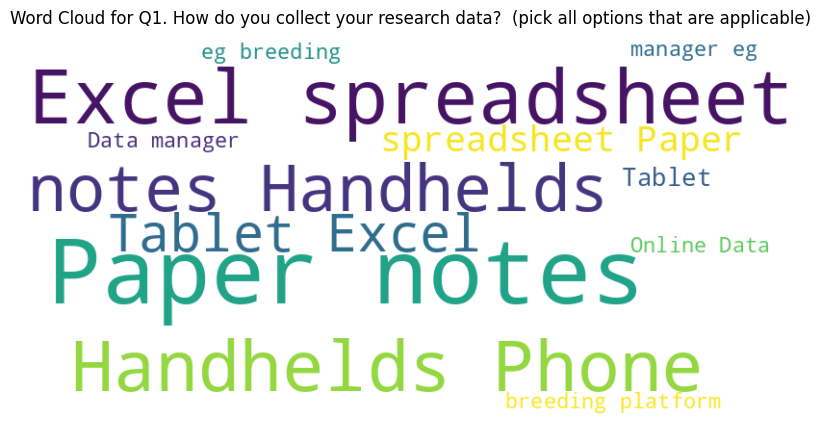

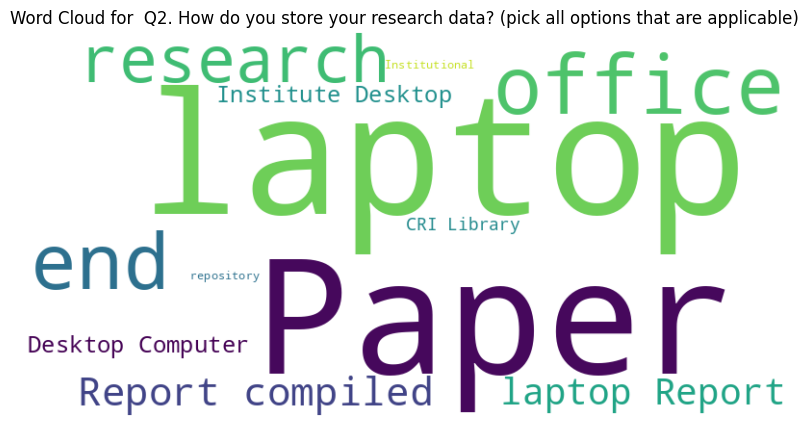

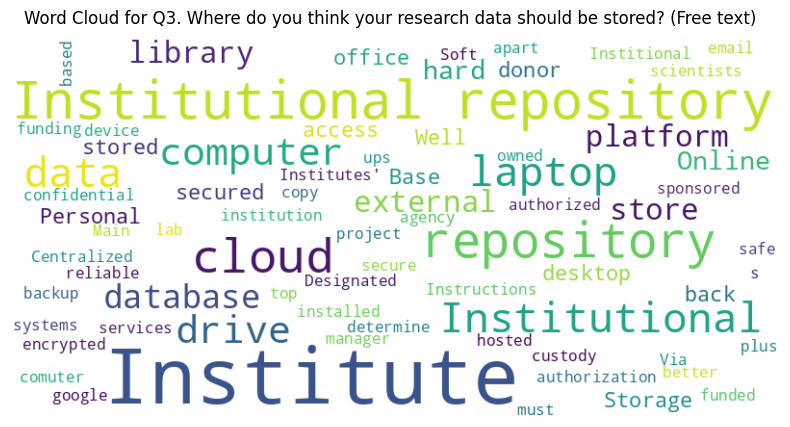

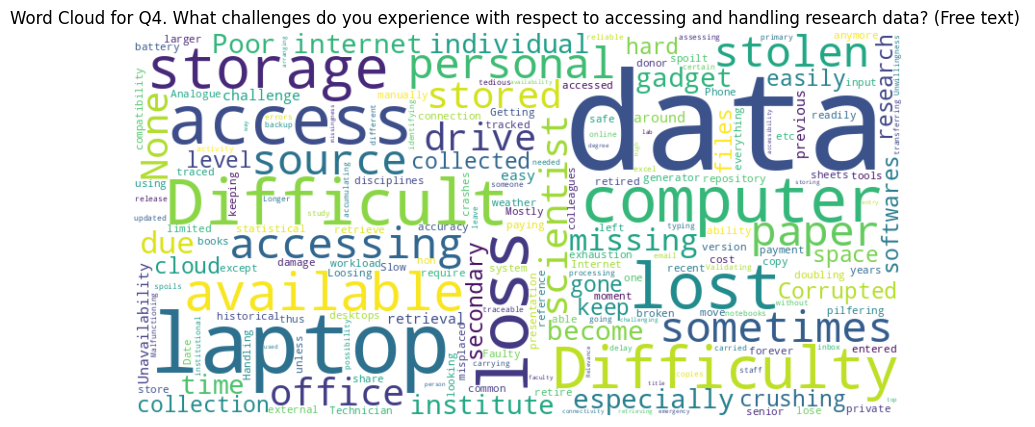

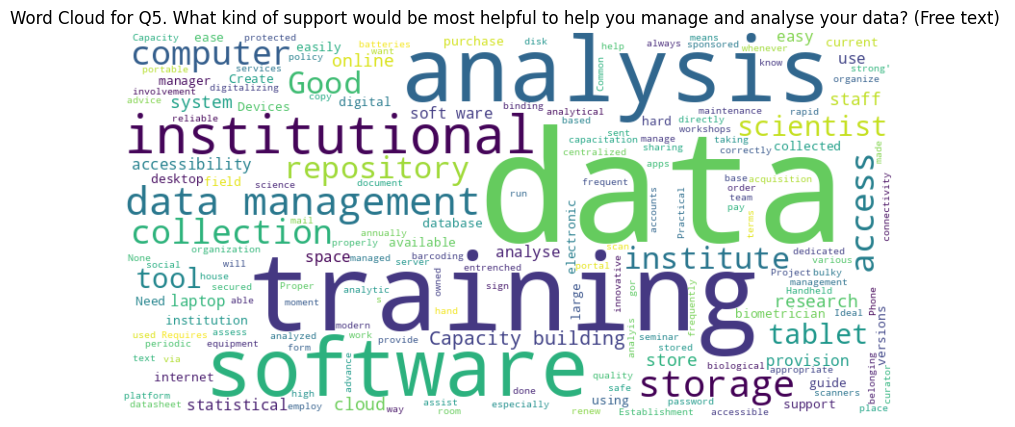

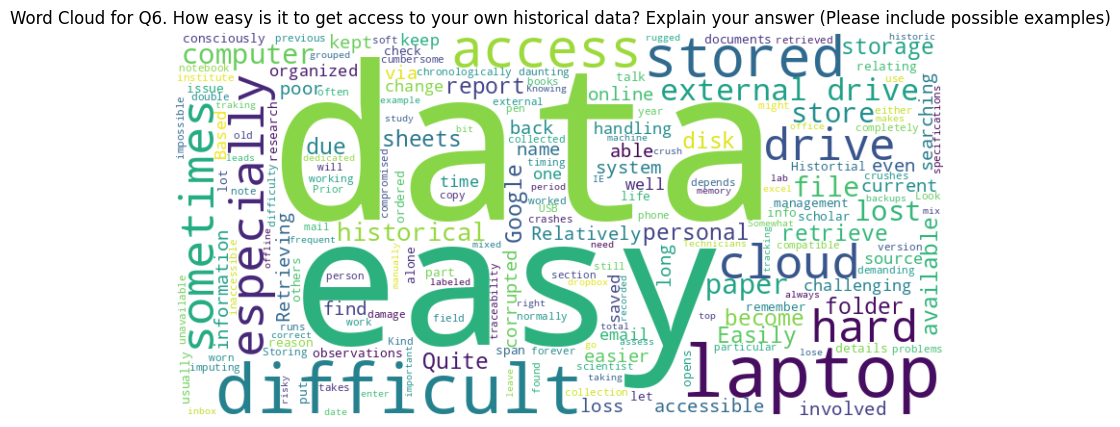

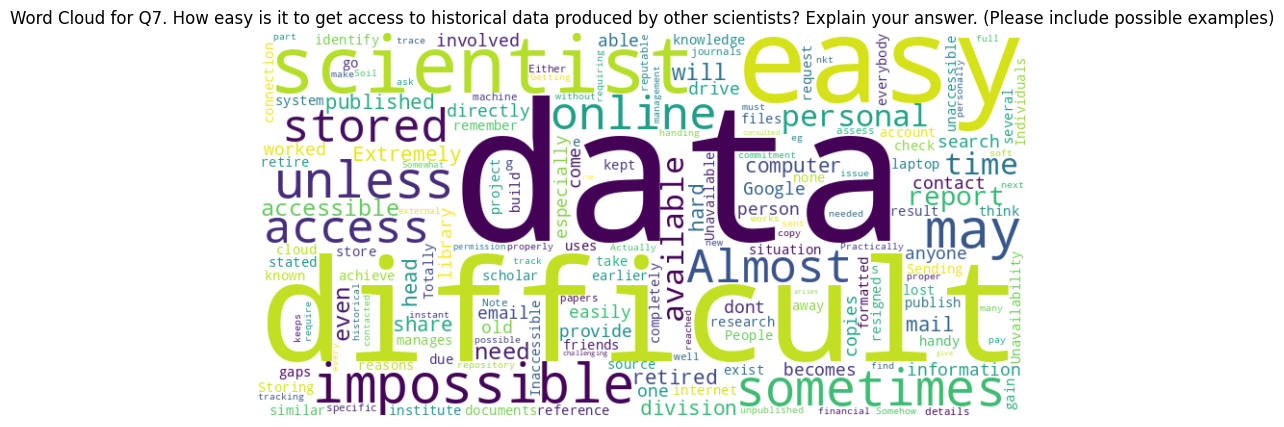

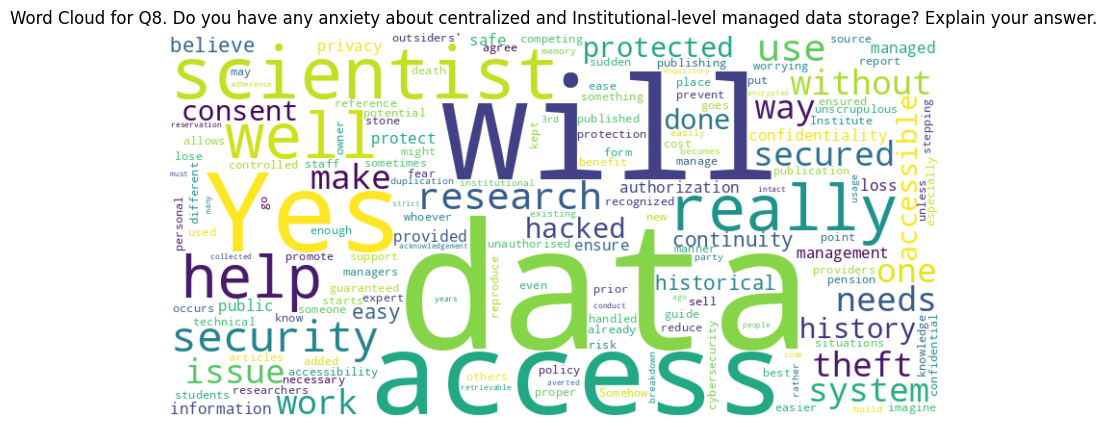

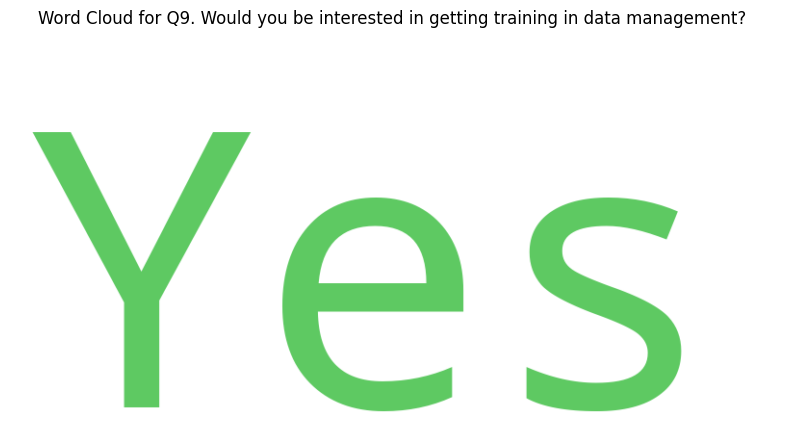

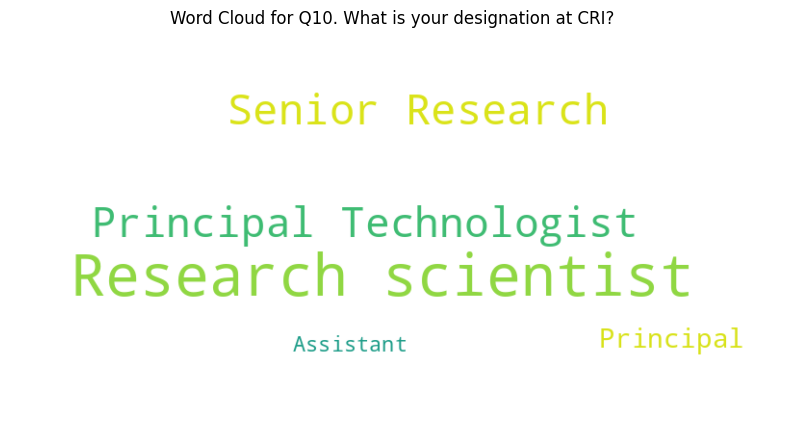

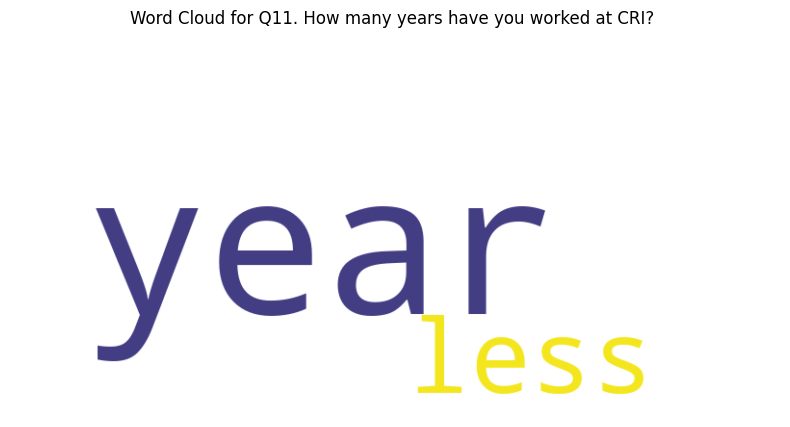

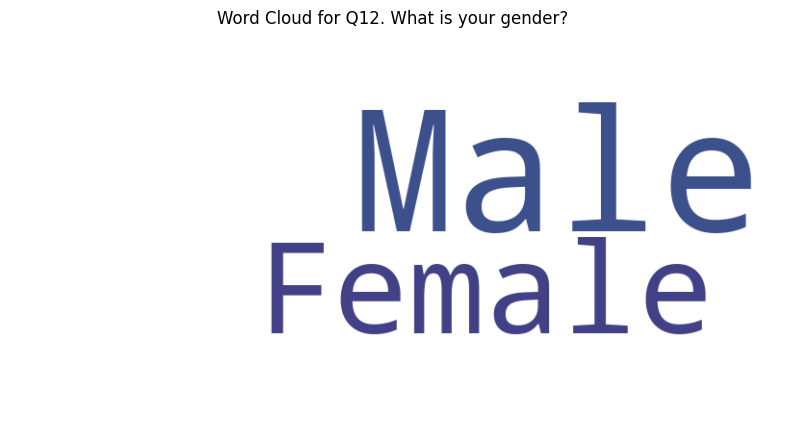

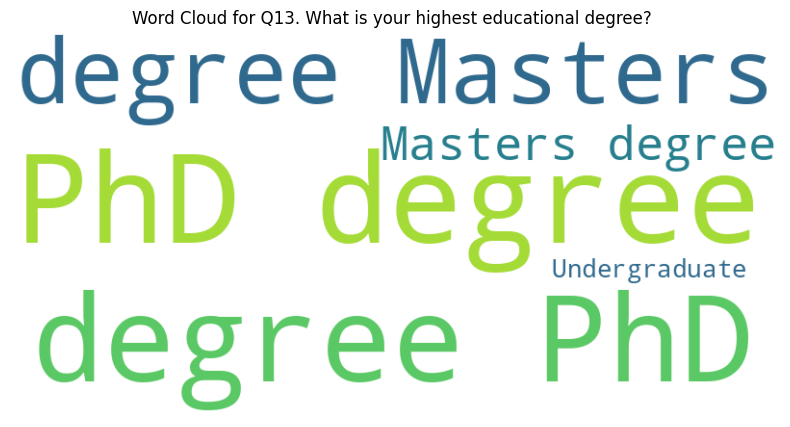

In [6]:
# Function to generate and display word cloud for a given set of responses
def generate_word_cloud(responses, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(responses))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Iterate over each question in the data and generate word clouds
for question, answers in dictionary_data.items():
    responses = [response for key, response in answers.items()]
    generate_word_cloud(responses, f'Word Cloud for {question}')


 **Thematic Analysis:**
   - Identify common themes in the responses across all columns. This can help you categorize and understand recurring topics or issues.
   - For example, look for recurring themes in challenges faced, types of support needed, and opinions on data storage locations.

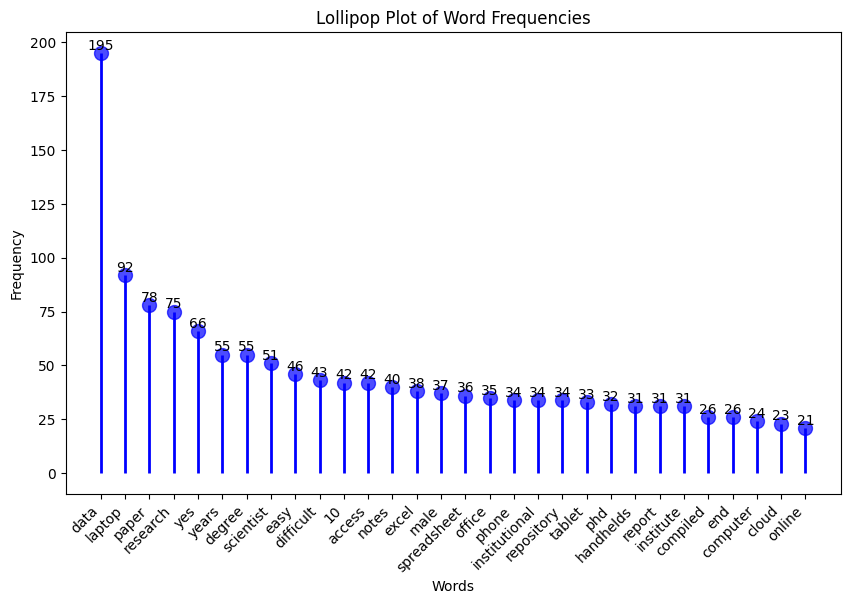

In [7]:
# Concatenate all responses into a single text
all_responses = ' '.join(df.values.flatten())

# Tokenize the text
tokens = word_tokenize(all_responses)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]

# Calculate word frequencies
freq_dist = FreqDist(filtered_tokens)

# Get the most common words
common_words = freq_dist.most_common(30)

# Extract data for lollipop plot
words, frequencies = zip(*common_words)
x_positions = np.arange(len(words))

# Plot the lollipop chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.vlines(x_positions, 0, frequencies, color='blue', lw=2)
ax.scatter(x_positions, frequencies, color='blue', s=100, alpha=0.7)

# Annotate each lollipop with frequency number
for x, y in zip(x_positions, frequencies):
    ax.text(x, y + 0.2, str(y), ha='center', va='bottom', color='black')

# Customize the plot
ax.set_xticks(x_positions)
ax.set_xticklabels(words, rotation=45, ha='right')
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_title('Lollipop Plot of Word Frequencies')

plt.show()

**Sentiment Analysis:**
   - Determine the sentiment (positive, negative, neutral) expressed in responses.
   - Explore the emotional tone and attitudes conveyed in the data.

Now, let's break down each part of the script:

1. **Combining Responses:**
   - The script starts by combining all responses into a single string (`all_responses`). This step is crucial for performing sentiment analysis on the entire dataset.

2. **Tokenization:**
   - The combined responses are then tokenized into individual sentences using the `sent_tokenize` function from the NLTK library. This step is essential to analyze sentiments on a sentence level.

3. **Sentiment Analysis:**
   - The Sentiment Intensity Analyzer (`SentimentIntensityAnalyzer` from NLTK's VADER module) is initialized. It assigns a sentiment polarity score to each sentence.
   - The script then iterates through each sentence, calculates the sentiment scores (positive, negative, neutral, and compound), and accumulates the compound scores for an overall sentiment score.

4. **Determining Overall Sentiment:**
   - The average sentiment score is calculated by dividing the overall sentiment score by the number of sentences.
   - Based on the average sentiment score, the script determines whether the overall sentiment is positive, negative, or neutral.

5. **Printing Results:**
   - Finally, the script prints the results, including the overall sentiment and the average sentiment score.

* **Sentement analysis on the responses of individual questions**

In [8]:

# Sample data (replace this with your actual data)
# data = {
#     'Q9. Would you be interested in getting training in data management? ': {...},
#     'Q10. What is your designation at CRI? ': {...},
#     'Q11. How many years have you worked at CRI? ': {...},
#     'Q12. What is your gender? ': {...},
#     'Q13. What is your highest educational degree? ': {...}
# }

# Function to analyze sentiments for a specific question
def analyze_sentiments(question, answers):
    all_responses = ' '.join(answers.values())
    sentences = sent_tokenize(all_responses)
    
    # Initialize the Sentiment Intensity Analyzer
    sia = SentimentIntensityAnalyzer()
    
    # Analyze sentiment for each sentence and calculate the overall sentiment
    overall_sentiment_score = 0
    for sentence in sentences:
        sentiment_score = sia.polarity_scores(sentence)['compound']
        overall_sentiment_score += sentiment_score
    
    # Calculate the average sentiment score
    average_sentiment_score = overall_sentiment_score / len(sentences)
    
    # Determine overall sentiment
    overall_sentiment = 'Positive' if average_sentiment_score > 0 else 'Negative' if average_sentiment_score < 0 else 'Neutral'
    
    # Print results
    print(f"\nSentiments for {question}:")
    print(f"Overall Sentiment: {overall_sentiment}")
    print(f"Overall Sentiment Score: {average_sentiment_score}")

# Analyze sentiments for each question
for question, answers in dictionary_data.items():
    analyze_sentiments(question, answers)



Sentiments for Q1. How do you collect your research data?  (pick all options that are applicable):
Overall Sentiment: Positive
Overall Sentiment Score: 0.9986

Sentiments for  Q2. How do you store your research data? (pick all options that are applicable):
Overall Sentiment: Neutral
Overall Sentiment Score: 0.0

Sentiments for Q3. Where do you think your research data should be stored? (Free text)  :
Overall Sentiment: Positive
Overall Sentiment Score: 0.3977

Sentiments for Q4. What challenges do you experience with respect to accessing and handling research data? (Free text) :
Overall Sentiment: Negative
Overall Sentiment Score: -0.3137461538461539

Sentiments for Q5. What kind of support would be most helpful to help you manage and analyse your data? (Free text) :
Overall Sentiment: Positive
Overall Sentiment Score: 0.36950588235294124

Sentiments for Q6. How easy is it to get access to your own historical data? Explain your answer (Please include possible examples):
Overall Sentim

* **sentement analysis on overall responses**

In [9]:

df_data  = df.copy()
# Combine responses into a single string
all_responses = ' '.join(df_data.stack().values)

# Tokenize the responses into sentences
sentences = sent_tokenize(all_responses)

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment for each sentence and calculate the overall sentiment
overall_sentiment_score = 0
for sentence in sentences:
    sentiment_score = sia.polarity_scores(sentence)['compound']
    overall_sentiment_score += sentiment_score

# Determine overall sentiment
if overall_sentiment_score >= 0.05:
    overall_sentiment = "Positive"
elif overall_sentiment_score <= -0.05:
    overall_sentiment = "Negative"
else:
    overall_sentiment = "Neutral"

# Display results
print("Overall Sentiment Analysis:")
print(f"Overall Sentiment: {overall_sentiment}")
print(f"Overall Sentiment Score: {overall_sentiment_score}")


Overall Sentiment Analysis:
Overall Sentiment: Positive
Overall Sentiment Score: 17.7294


The results of the sentiment analysis indicate an overall **positive sentiment** in respondents' answers regarding centralized data storage. The majority of the sentiments expressed in the respondents' answers are positive, suggesting that they generally view centralized data storage in a favorable light. Positive sentiments include trust in the system's security, belief in the benefits of data accessibility, and confidence in centralized management. 

 **Topic Modeling:**

  - Use techniques like Latent Dirichlet Allocation (LDA) to identify latent topics in the responses. This helps to discover underlying themes and topics that may not be immediately apparent.

  - Here, we try to discover hidden topics/ information in the responses from the survey using the responses under **'Q8. Do you have any anxiety about centralized and Institutional-level managed data storage? Explain your answer.'**


Cluster 1 Keywords: data, yes, theft, management, provided, authorization, continuity, protect, scientist, cost
Cluster 2 Keywords: data, access, really, use, help, work, needs, make, way, public
Cluster 3 Keywords: access, scientists, data, hacked, managed, secured, yes, believe, historical, really
Cluster 4 Keywords: security, data, yes, issues, confidentiality, safe, don, articles, agree, unless
Cluster 5 Keywords: research, protected, yes, easy, access, scientist, scientists, history, consent, information


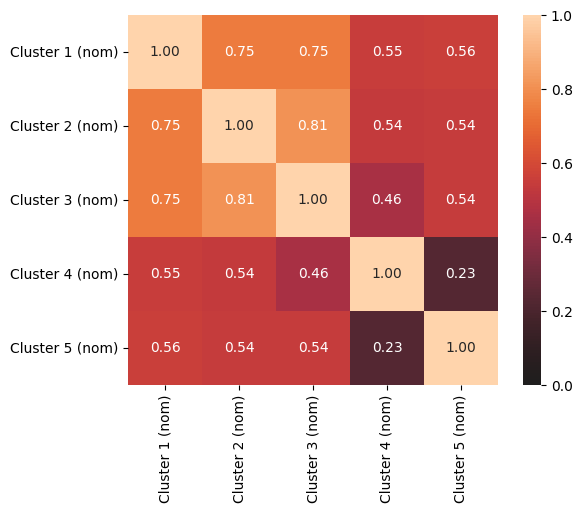

Correlation Matrix:
{'corr':                  Cluster 1 (nom)  Cluster 2 (nom)  Cluster 3 (nom)  \
Cluster 1 (nom)         1.000000         0.745308         0.745308   
Cluster 2 (nom)         0.745308         1.000000         0.806605   
Cluster 3 (nom)         0.745308         0.806605         1.000000   
Cluster 4 (nom)         0.551569         0.537133         0.458329   
Cluster 5 (nom)         0.561835         0.542222         0.542222   

                 Cluster 4 (nom)  Cluster 5 (nom)  
Cluster 1 (nom)         0.551569         0.561835  
Cluster 2 (nom)         0.537133         0.542222  
Cluster 3 (nom)         0.458329         0.542222  
Cluster 4 (nom)         1.000000         0.231970  
Cluster 5 (nom)         0.231970         1.000000  , 'ax': <Axes: >}


In [10]:

# Assuming your data is stored in a DataFrame named 'df' with a column 'responses'
# If your data is stored differently, please adjust accordingly

# Extract responses for Q8 from the dictionary
responses_q8 = [response for key, response in dictionary_data['Q8. Do you have any anxiety about centralized and Institutional-level managed data storage? Explain your answer.'].items()]

# Convert list to DataFrame
df = pd.DataFrame({'responses': responses_q8})

# Handle missing values
df['responses'].fillna('', inplace=True)

# Vectorize responses
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['responses'])

# Apply LDA
num_topics = 5  # Adjust the number of topics as needed
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Get the most important words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_keywords_idx = topic.argsort()[:-10 - 1:-1]
    top_keywords = [feature_names[i] for i in top_keywords_idx]
    print(f"Cluster {topic_idx + 1} Keywords: {', '.join(top_keywords)}")

# Code responses based on clusters
coded_data = pd.DataFrame()
for topic_idx, topic in enumerate(lda.components_):
    top_keywords_idx = topic.argsort()[:-10 - 1:-1]
    top_keywords = [feature_names[i] for i in top_keywords_idx]
    coded_data[f"Cluster {topic_idx + 1}"] = df['responses'].apply(lambda response: any(keyword in response for keyword in top_keywords))

# Calculate correlation matrix using mic

corr_matrix = associations(coded_data, nominal_columns=list(coded_data.columns), mark_columns=True)

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)


The output shows the keywords for each cluster obtained through Latent Dirichlet Allocation (LDA) decomposition of the responses related to centralized data storage concerns. The clusters are represented by the top words associated with each cluster. Here's a brief interpretation:

### Cluster Keywords:
1. **Cluster 1:**
   - Keywords: data, yes, theft, management, provided, authorization, continuity, protect, scientist, cost
   - This cluster seems to capture concerns about data theft, the need for proper management, authorization for data access, and ensuring continuity.

2. **Cluster 2:**
   - Keywords: data, access, really, use, help, work, needs, make, way, public
   - This cluster may represent positive sentiments regarding the benefits of data access, assistance in work, and the potential to make data accessible to the public.

3. **Cluster 3:**
   - Keywords: access, scientists, data, hacked, managed, secured, yes, believe, historical, really
   - This cluster reflects concerns about access control, data security, and a positive view on the historical aspect of data.

4. **Cluster 4:**
   - Keywords: security, data, yes, issues, confidentiality, safe, don, articles, agree, unless
   - This cluster highlights concerns about data security, confidentiality, and the need for agreement unless certain conditions are met.

5. **Cluster 5:**
   - Keywords: research, protected, yes, easy, access, scientist, scientists, history, consent, information
   - This cluster seems to focus on the protection of research data, easy access, and the importance of consent and information.

### Correlation Matrix:
- The correlation matrix shows the pairwise correlation between the clusters. It ranges from 0 to 1, where 1 indicates a perfect positive correlation. 
- The matrix suggests moderate to strong positive correlations between clusters, indicating some shared sentiments or concerns.

### Interpretation:
- Clusters 1 and 2 are moderately positively correlated, suggesting that concerns about data theft (Cluster 1) may somewhat align with positive sentiments about data access and assistance (Cluster 2).
- Clusters 3 and 5 show a relatively strong positive correlation, implying that concerns about data security and access control (Cluster 3) are related to sentiments about protecting research data and ensuring easy access (Cluster 5).

This analysis helps uncover underlying themes in respondents' concerns and sentiments about centralized data storage.

**Frequency Analysis:**
   - Count the frequency of specific words or phrases in the free-text responses to identify common trends or concerns.
   - For instance, identify frequently mentioned challenges, desired types of support, or preferred data storage methods.
   - Enhance the script by adding a list of common English stop words to ignore during the frequency analysis.

repository: 24 times
institutional: 21 times
cloud: 10 times
institute: 8 times
data: 8 times
laptop: 8 times
institutes: 7 times
computer: 6 times
database: 5 times
drive: 5 times


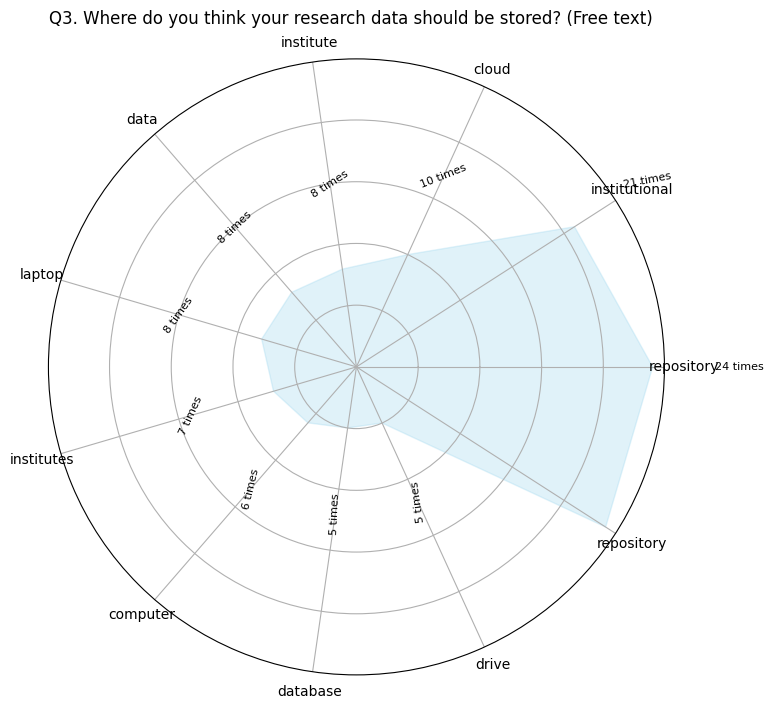

data: 48 times
laptop: 8 times
access: 7 times
loss: 7 times
difficult: 6 times
lost: 5 times
difficulty: 5 times
storage: 5 times
available: 4 times
accessing: 4 times


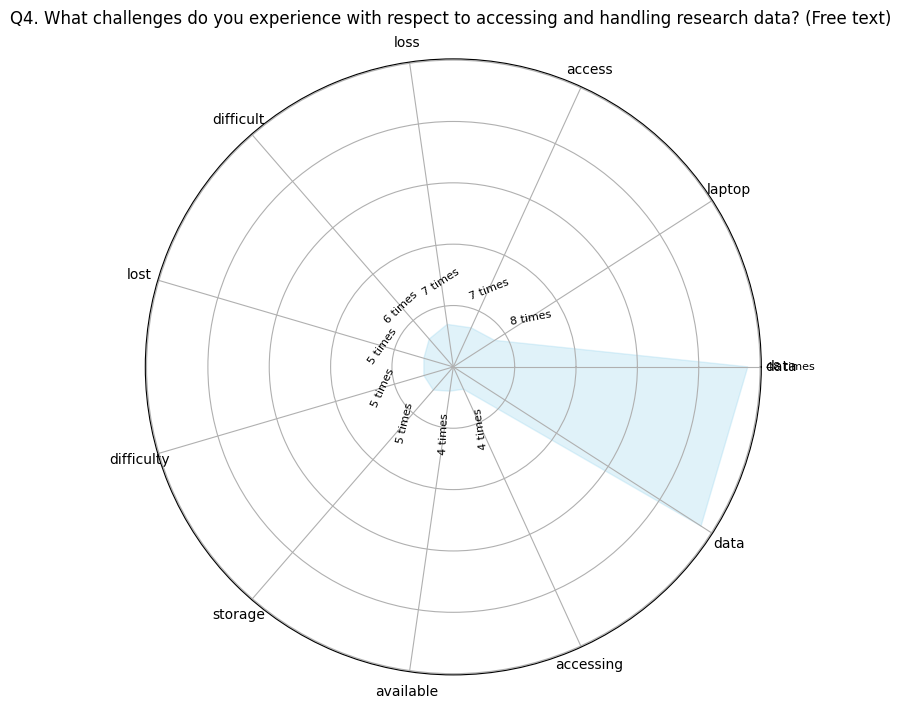

data: 46 times
training: 14 times
analysis: 14 times
management: 11 times
institutional: 10 times
storage: 9 times
access: 7 times
repository: 6 times
software: 6 times
collection: 6 times


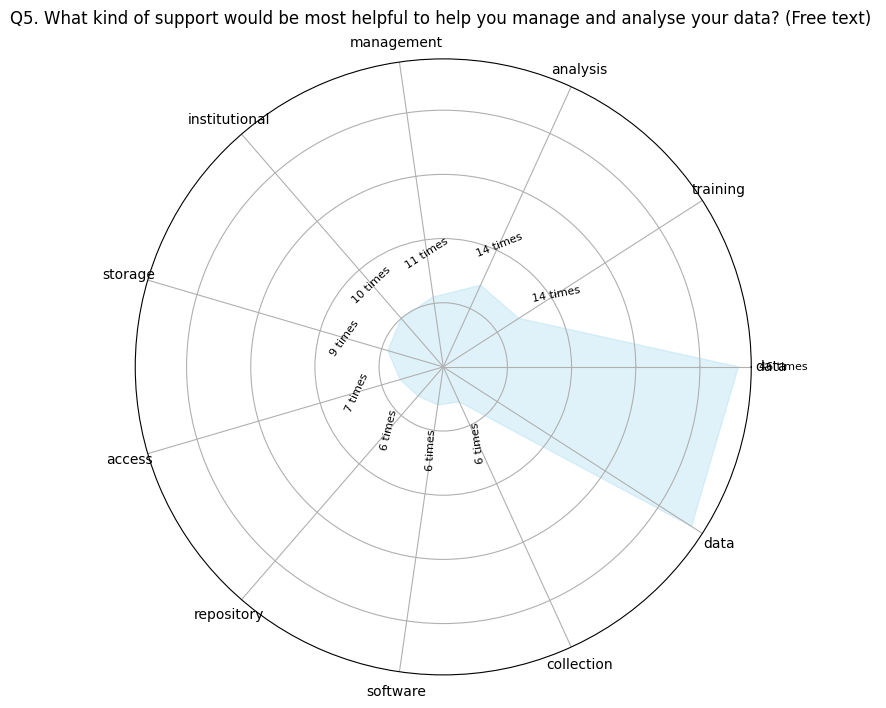

data: 31 times
easy: 21 times
laptop: 18 times
difficult: 16 times
stored: 10 times
access: 9 times
drive: 8 times
sometimes: 7 times
cloud: 7 times
external: 7 times


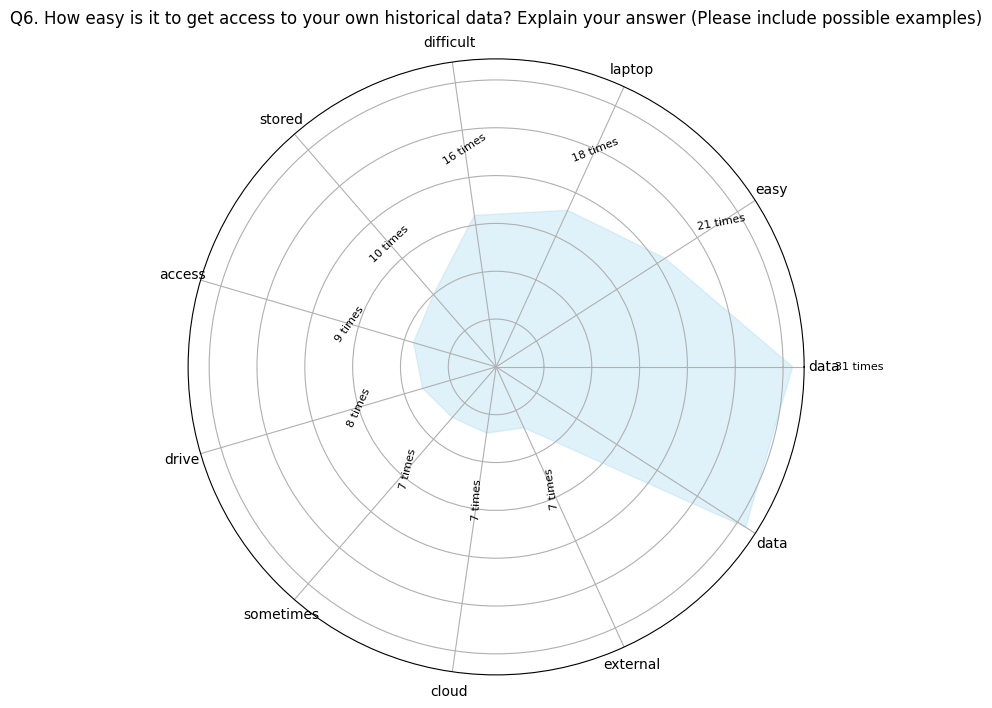

data: 25 times
difficult: 21 times
easy: 18 times
impossible: 7 times
may: 7 times
sometimes: 6 times
unless: 6 times
scientist: 6 times
get: 6 times
access: 5 times


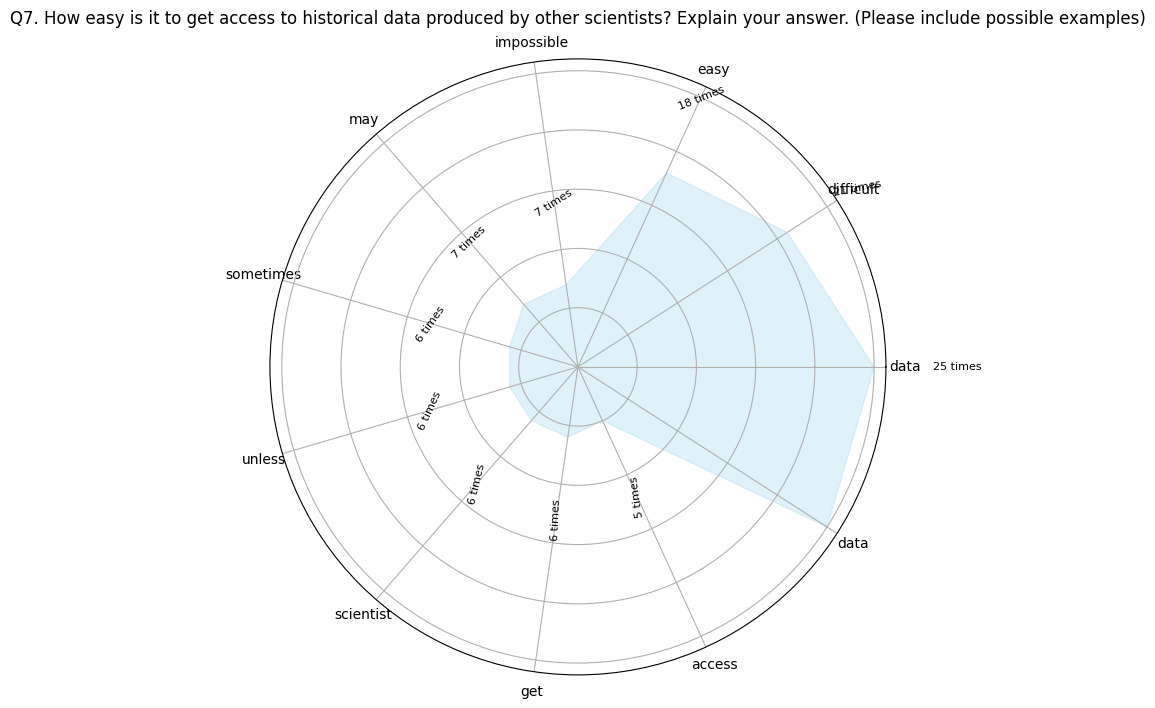

data: 31 times
access: 12 times
yes: 11 times
really: 6 times
well: 6 times
help: 5 times
security: 5 times
get: 4 times
use: 4 times
scientists: 4 times


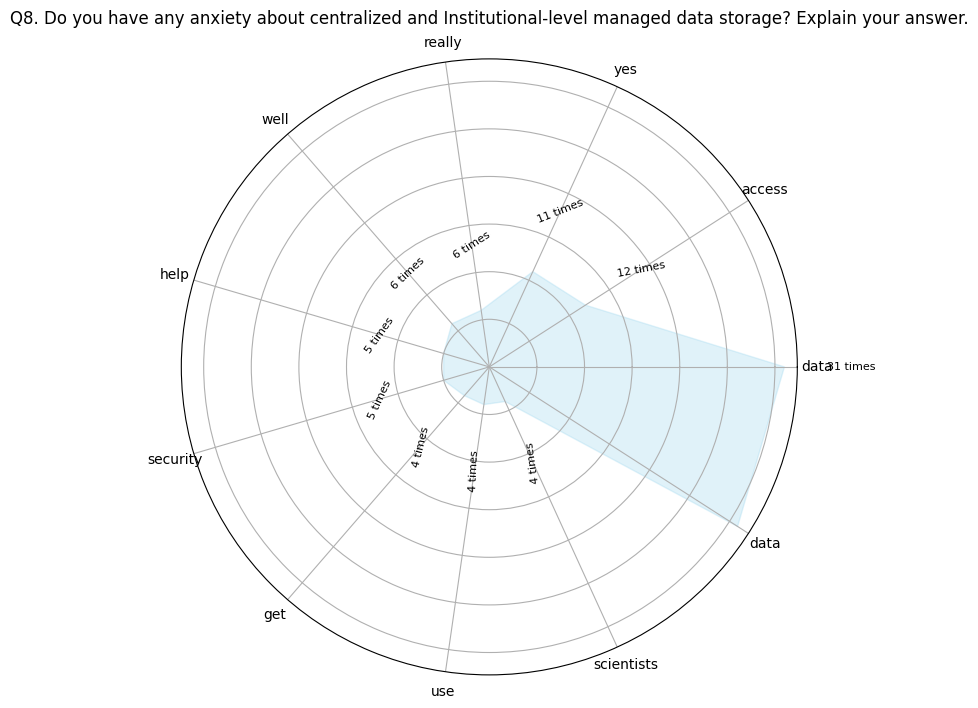

In [11]:

# Define the questions for frequency analysis
questions_to_analyze = [
    'Q3. Where do you think your research data should be stored? (Free text)  ',
 'Q4. What challenges do you experience with respect to accessing and handling research data? (Free text) ',
 'Q5. What kind of support would be most helpful to help you manage and analyse your data? (Free text) ',
 'Q6. How easy is it to get access to your own historical data? Explain your answer (Please include possible examples)',
 'Q7. How easy is it to get access to historical data produced by other scientists? Explain your answer. (Please include possible examples)',
 'Q8. Do you have any anxiety about centralized and Institutional-level managed data storage? Explain your answer.',
]

# Function to clean and tokenize text
def clean_and_tokenize(text):
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    tokens = cleaned_text.split()
    return tokens

# Function to create a radar chart
def create_radar_chart(words, frequencies, question):
    categories = [word for word, _ in frequencies]
    values = [freq for _, freq in frequencies]

    # Ensure the radar chart is closed
    categories += [categories[0]]
    values += [values[0]]

    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='skyblue', alpha=0.25)
    ax.set_yticklabels([])
    ax.set_thetagrids(angles * 180/np.pi, categories)
    
    # # Annotate the radar chart with frequency values
    # for angle, category, value in zip(angles, categories, values):
    #     ax.annotate(f"{value} times", xy=(angle, value), xytext=(angle, value + 5),
    #                 ha='center', va='center', fontsize=8, color='black')

    # Annotate the radar chart with rotated frequency values
    for angle, category, value in zip(angles, categories[:-1], values[:-1]):
        ax.annotate(f"{value} times", xy=(angle, value), xytext=(angle, value + 7),
                    ha='center', va='center', fontsize=8, color='black', rotation=angle * 60/np.pi)

    # # Annotate the radar chart with rotated frequency values and words
    # for angle, category, value in zip(angles, categories[:-1], values[:-1]):
    #     rotated_angle = angle - np.pi / len(categories)
    #     ax.annotate(f"{value} times", xy=(angle, value), xytext=(angle, value + 5),
    #                 ha='center', va='center', fontsize=8, color='black', rotation=rotated_angle * 60/np.pi)
    #     ax.text(angle, max(values) + 15, category, ha='center', va='center', fontsize=8, color='black', rotation=rotated_angle * 45/np.pi)



    ax.set_title(question, va='bottom')
    plt.show()

# Perform frequency analysis and create radar chart for each question
for question in questions_to_analyze:
    # Extract responses for the current question from the dictionary
    responses = [response for key, response in dictionary_data[question].items()]
    
    # Combine all responses into a single string
    all_responses = ' '.join(responses)
    
    # # Tokenize the combined responses
    # tokens = clean_and_tokenize(all_responses)

    # Tokenize the combined responses and remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in clean_and_tokenize(all_responses) if word not in stop_words]
    
    
    # Count the frequency of each word
    word_frequency = Counter(tokens)
    
    # Display the top 10 most frequent words
    top_words = word_frequency.most_common(10)
    for word, frequency in top_words:
        print(f"{word}: {frequency} times")
    
    # Create and display the radar chart
    create_radar_chart(top_words, top_words, question)


**Concerns and Suggestions:**
   - Categorize responses into concerns and suggestions.
   - Identify the main worries or issues raised by respondents and any recommendations they provide.

This script defines two lists, one for concern keywords and another for suggestion keywords. It then categorizes responses based on the presence of these keywords. The results are printed for both concerns and suggestions.

In [12]:

# Define keywords for concerns and suggestions
concern_keywords = ['concern', 'worry', 'issue', 'problem', 'challenge']
suggestion_keywords = ['suggest', 'recommend', 'improve', 'solution']

# Function to categorize responses into concerns and suggestions
def categorize_concerns_suggestions(responses):
    concerns = []
    suggestions = []

    for response in responses:
        # Clean and tokenize text
        cleaned_text = re.sub(r'[^a-zA-Z\s]', '', response.lower())
        tokens = cleaned_text.split()

        # Check for concern keywords
        if any(keyword in tokens for keyword in concern_keywords):
            concerns.append(response)
        # Check for suggestion keywords
        elif any(keyword in tokens for keyword in suggestion_keywords):
            suggestions.append(response)

    return concerns, suggestions

# Define the question for concerns and suggestions analysis
question_to_analyze = 'Q8. Do you have any anxiety about centralized and Institutional-level managed data storage? Explain your answer.'

# Extract responses for the specified question from the dictionary
responses_to_analyze = [response for key, response in dictionary_data[question_to_analyze].items()]

# Categorize concerns and suggestions
concerns, suggestions = categorize_concerns_suggestions(responses_to_analyze)

# Display the results
print(f"Concerns ({len(concerns)} responses):")
for i, concern in enumerate(concerns, start=1):
    print(f"{i}. {concern}")

print("\nSuggestions ({len(suggestions)} responses):")
for i, suggestion in enumerate(suggestions, start=1):
    print(f"{i}. {suggestion}")


Concerns (1 responses):
1. The only issue will be its confidentiality and security.

Suggestions ({len(suggestions)} responses):


#### Clustering Analysis

Cluster analysis involves grouping similar responses together based on certain features or characteristics. In this case, we can use clustering algorithms like `PCA` (Principal Component Analysis) and `t-SNE` (t-Distributed Stochastic Neighbor Embedding) to identify patterns and commonalities in the dataset. 

In [30]:
df

Q1. How do you collect your research data?  (pick all options that are applicable)  \
0   Handhelds (Phone or Tablet), Online Data manag...                                   
1   Paper notes, Handhelds (Phone or Tablet), Exce...                                   
2          Online Data manager (eg breeding platform)                                   
3   Paper notes, Handhelds (Phone or Tablet), Exce...                                   
4            Paper notes, Handhelds (Phone or Tablet)                                   
5                      Paper notes, Excel spreadsheet                                   
6                      Paper notes, Excel spreadsheet                                   
7   Paper notes, Handhelds (Phone or Tablet), Exce...                                   
8   Paper notes, Handhelds (Phone or Tablet), Exce...                                   
9                      Paper notes, Excel spreadsheet                                   
10  Paper notes, Handhelds (Phone or Tablet), Exce...                                   
11                     Paper notes, Excel spreadsheet                                   
12  Paper notes, Handhelds (Phone or Tablet), Exce...                                   
13                        Handhelds (Phone or Tablet)                                   
14                                  Excel spreadsheet                                   
15                        Handhelds (Phone or Tablet)                                   
16  Paper notes, Handhelds (Phone or Tablet), Onli...                                   
17                     Paper notes, Excel spreadsheet                                   
18                     Paper notes, Excel spreadsheet                                   
19  Paper notes, Handhelds (Phone or Tablet), Exce...                                   
20                        Handhelds (Phone or Tablet)                                   
21                                        Paper notes                                   
22                        Handhelds (Phone or Tablet)                                   
23                                  Excel spreadsheet                                   
24  Paper notes, Handhelds (Phone or Tablet), Exce...                                   
25           Paper notes, Handhelds (Phone or Tablet)                                   
26  Paper notes, Handhelds (Phone or Tablet), Exce...                                   
27  Paper notes, Handhelds (Phone or Tablet), Exce...                                   
28           Paper notes, Handhelds (Phone or Tablet)                                   
29           Paper notes, Handhelds (Phone or Tablet)                                   
30                                  Excel spreadsheet                                   
31     Handhelds (Phone or Tablet), Excel spreadsheet                                   
32                     Paper notes, Excel spreadsheet                                   
33  Paper notes, Handhelds (Phone or Tablet), Exce...                                   
34  Paper notes, Handhelds (Phone or Tablet), Exce...                                   
35           Paper notes, Handhelds (Phone or Tablet)                                   
36  Paper notes, Handhelds (Phone or Tablet), Exce...                                   
37                                        Paper notes                                   
38  Paper notes, Handhelds (Phone or Tablet), Exce...                                   
39                     Paper notes, Excel spreadsheet                                   
40  Paper notes, Handhelds (Phone or Tablet), Exce...                                   
41                                  Excel spreadsheet                                   
42                                  Excel spreadsheet                                   
43                                        Paper notes                                  

In [32]:
# Convert the data to DataFrame
dff = pd.DataFrame.from_dict(dictionary_data, orient='index')

# Concatenate responses into a single string for vectorization
all_responses = dff.values.flatten()
all_responses

array(['Handhelds (Phone or Tablet), Online Data manager (eg breeding platform)',
       'Paper notes, Handhelds (Phone or Tablet), Excel spreadsheet',
       'Online Data manager (eg breeding platform)',
       'Paper notes, Handhelds (Phone or Tablet), Excel spreadsheet, Online Data manager (eg breeding platform)',
       'Paper notes, Handhelds (Phone or Tablet)',
       'Paper notes, Excel spreadsheet', 'Paper notes, Excel spreadsheet',
       'Paper notes, Handhelds (Phone or Tablet), Excel spreadsheet, Online Data manager (eg breeding platform)',
       'Paper notes, Handhelds (Phone or Tablet), Excel spreadsheet, Other',
       'Paper notes, Excel spreadsheet',
       'Paper notes, Handhelds (Phone or Tablet), Excel spreadsheet',
       'Paper notes, Excel spreadsheet',
       'Paper notes, Handhelds (Phone or Tablet), Excel spreadsheet',
       'Handhelds (Phone or Tablet)', 'Excel spreadsheet',
       'Handhelds (Phone or Tablet)',
       'Paper notes, Handhelds (Phone or Tabl

Here's a script to perform cluster analysis using these algorithms:

/home/laklevi1/anarh/ENV/new_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/laklevi1/anarh/ENV/new_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


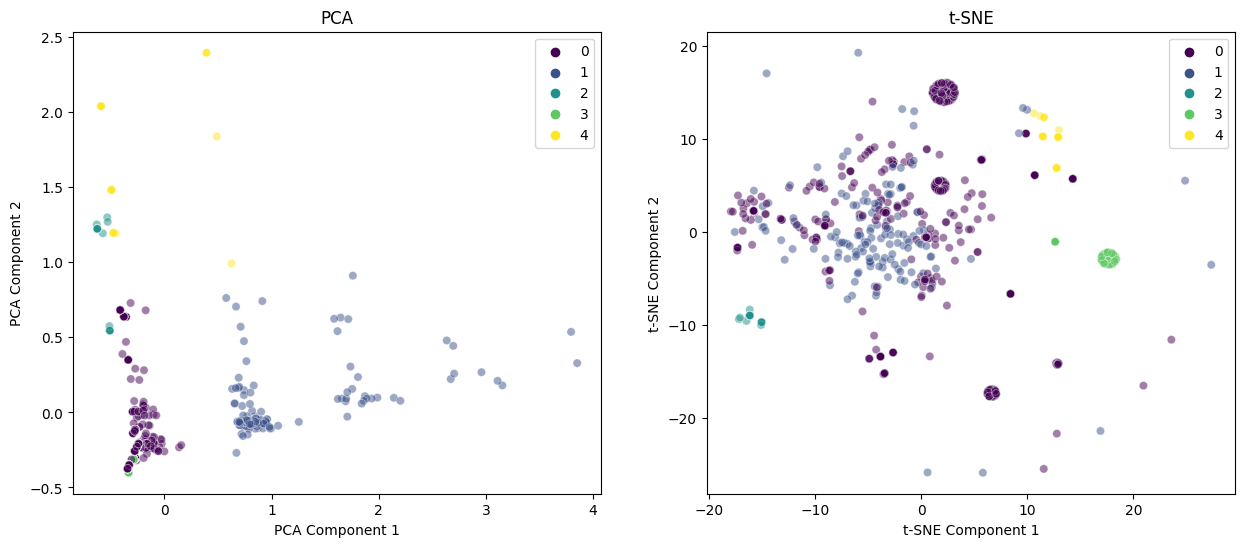

In [34]:
# Convert list to DataFrame
dff = pd.DataFrame({'responses': all_responses})

# Handle missing values
dff['responses'].fillna('', inplace=True)

# Vectorize responses
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(dff['responses'])

# Apply PCA
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(X.toarray())

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
tsne_result = tsne.fit_transform(X.toarray())

# Get cluster labels using K-means or any other clustering algorithm
# For example, using K-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(X.toarray())

# Create separate DataFrames for each cluster in PCA
pca_dfs = [pd.DataFrame({
    'text': dff['responses'][cluster_labels == i],
    f'PCA Component 1 (Cluster {i})': pca_result[cluster_labels == i, 0],
    f'PCA Component 2 (Cluster {i})': pca_result[cluster_labels == i, 1],
    'Cluster': [i] * sum(cluster_labels == i)
}) for i in range(max(cluster_labels) + 1)]

# Create separate DataFrames for each cluster in t-SNE
tsne_dfs = [pd.DataFrame({
    'text': dff['responses'][cluster_labels == i],
    f't-SNE Component 1 (Cluster {i})': tsne_result[cluster_labels == i, 0],
    f't-SNE Component 2 (Cluster {i})': tsne_result[cluster_labels == i, 1],
    'Cluster': [i] * sum(cluster_labels == i)
}) for i in range(max(cluster_labels) + 1)]

# Plot PCA and t-SNE results with different colors for clusters and legends
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=cluster_labels, palette='viridis', legend='full', alpha=0.5)
plt.title('PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.subplot(1, 2, 2)
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=cluster_labels, palette='viridis', legend='full', alpha=0.5)
plt.title('t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.show()

### print first 20 text of each cluster for using PCA

In [35]:
pca_dfs[0].head(n=20)

text  PCA Component 1 (Cluster 0)  \
13  Handhelds (Phone or Tablet)                    -0.358513   
14            Excel spreadsheet                    -0.338746   
15  Handhelds (Phone or Tablet)                    -0.358513   
20  Handhelds (Phone or Tablet)                    -0.358513   
21                  Paper notes                    -0.378682   
22  Handhelds (Phone or Tablet)                    -0.358513   
23            Excel spreadsheet                    -0.338746   
30            Excel spreadsheet                    -0.338746   
37                  Paper notes                    -0.378682   
41            Excel spreadsheet                    -0.338746   
42            Excel spreadsheet                    -0.338746   
43                  Paper notes                    -0.378682   
44     Excel spreadsheet, Other                    -0.338746   
46           Paper notes, Other                    -0.378682   
48                  Paper notes                    -0.378682   
51            Excel spreadsheet                    -0.338746   
52            Excel spreadsheet                    -0.338746   
53                  Paper notes                    -0.378682   
56  Paper in office, Own laptop                    -0.413701   
57                   Own laptop                    -0.296144   

    PCA Component 2 (Cluster 0)  Cluster  
13                     0.636211        0  
14                     0.350092        0  
15                     0.636211        0  
20                     0.636211        0  
21                     0.637825        0  
22                     0.636211        0  
23                     0.350092        0  
30                     0.350092        0  
37                     0.637825        0  
41                     0.350092        0  
42                     0.350092        0  
43                     0.637825        0  
44                     0.350092        0  
46                     0.637825        0  
48                     0.637825        0  
51                     0.350092        0  
52                     0.350092        0  
53                     0.637825        0  
56                     0.681969        0  
57                     0.004433        0

In [36]:
pca_dfs[1].head(n=20)

text  \
2           Online Data manager (eg breeding platform)   
116  Data must be stored in a confidential or secur...   
118  Well, if it is a donor funded project, the don...   
120                      Institutional data repository   
153                        Institutes' data repository   
156  Institutional Data Storage Base, office deskto...   
159  Institute's data base systems and institute's ...   
164                                    Data Repository   
165  lost data from retired scientist , difficulty ...   
168  none except for accessing historical data on a...   
171  When out of the office, data stored in books a...   
172  pilfering, loss of data through computer crush...   
173  If it is for the donor, it is gone forever, un...   
174                       Laptop crashes, missing data   
175                   Getting access to secondary data   
176  Slow data collection and limited ability in us...   
177  Data storage and how to keep it private, since...   
179                               Analogue data input    
180  Office computer is not available to store or k...   
181      Some research data are not readily available    

     PCA Component 1 (Cluster 1)  PCA Component 2 (Cluster 1)  Cluster  
2                       0.741915                     0.148706        1  
116                     0.765661                    -0.054909        1  
118                     1.987151                     0.098662        1  
120                     0.727621                    -0.088982        1  
153                     0.699948                    -0.081139        1  
156                     0.764543                     0.341367        1  
159                     0.846816                    -0.027070        1  
164                     0.698274                    -0.079569        1  
165                     1.691162                     0.074476        1  
168                     1.655882                     0.092531        1  
171                     2.695533                     0.443349        1  
172                     0.953826                    -0.044697        1  
173                     0.949579                    -0.061485        1  
174                     0.631324                     0.156986        1  
175                     0.812165                    -0.074603        1  
176                     0.777199                    -0.056355        1  
177                     0.691093                     0.162446        1  
179                     0.680374                    -0.059884        1  
180                     0.693055                     0.231140        1  
181                     0.655201                     0.060423        1

In [37]:
pca_dfs[2].head(n=20)

text  \
55  Own laptop, Report compiled at the end of the ...   
58  Paper in office, Own laptop, Report compiled a...   
59  Own laptop, Report compiled at the end of the ...   
61  Paper in office, Own laptop, Report compiled a...   
62  Paper in office, Own laptop, Report compiled a...   
63  Paper in office, Own laptop, Report compiled a...   
64  Own laptop, Report compiled at the end of the ...   
65  Paper in office, Own laptop, Report compiled a...   
69  Own laptop, Report compiled at the end of the ...   
71  Own laptop, Report compiled at the end of the ...   
73  Paper in office, Own laptop, Report compiled a...   
74  Paper in office, Own laptop, Report compiled a...   
79  Paper in office, Own laptop, Report compiled a...   
81  Own laptop, Report compiled at the end of the ...   
82  Paper in office, Own laptop, CRI Library, Repo...   
86  Paper in office, Own laptop, Report compiled a...   
87  Paper in office, Own laptop, Report compiled a...   
88  Paper in office, Own laptop, Institute Desktop...   
91  Paper in office, Own laptop, Report compiled a...   
95  Paper in office, Own laptop, Report compiled a...   

    PCA Component 1 (Cluster 2)  PCA Component 2 (Cluster 2)  Cluster  
55                    -0.509822                     0.545310        2  
58                    -0.627379                     1.222845        2  
59                    -0.509822                     0.545310        2  
61                    -0.627379                     1.222845        2  
62                    -0.627379                     1.222845        2  
63                    -0.627379                     1.222845        2  
64                    -0.509822                     0.545310        2  
65                    -0.575423                     1.193122        2  
69                    -0.509822                     0.545310        2  
71                    -0.509822                     0.545310        2  
73                    -0.627379                     1.222845        2  
74                    -0.627379                     1.222845        2  
79                    -0.627379                     1.222845        2  
81                    -0.509822                     0.545310        2  
82                    -0.631660                     1.252583        2  
86                    -0.627379                     1.222845        2  
87                    -0.627379                     1.222845        2  
88                    -0.534200                     1.299379        2  
91                    -0.627379                     1.222845        2  
95                    -0.627379                     1.222845        2

In [38]:
pca_dfs[3].head(n=20)

text  PCA Component 1 (Cluster 3)  \
550           Over 10 years                    -0.334432   
551           Over 10 years                    -0.334432   
552  Between 5 and 10 years                    -0.334432   
553           Over 10 years                    -0.334432   
554           Over 10 years                    -0.334432   
555           Over 10 years                    -0.334432   
556   Between 1 and 5 years                    -0.285831   
557           Over 10 years                    -0.334432   
558           Over 10 years                    -0.334432   
559           Over 10 years                    -0.334432   
560   Between 1 and 5 years                    -0.285831   
561  Between 5 and 10 years                    -0.334432   
562   Between 1 and 5 years                    -0.285831   
563           Over 10 years                    -0.334432   
564           Over 10 years                    -0.334432   
565   Between 1 and 5 years                    -0.285831   
566           Over 10 years                    -0.334432   
567           Over 10 years                    -0.334432   
568           Over 10 years                    -0.334432   
569           Over 10 years                    -0.334432   

     PCA Component 2 (Cluster 3)  Cluster  
550                    -0.401579        3  
551                    -0.401579        3  
552                    -0.401579        3  
553                    -0.401579        3  
554                    -0.401579        3  
555                    -0.401579        3  
556                    -0.313452        3  
557                    -0.401579        3  
558                    -0.401579        3  
559                    -0.401579        3  
560                    -0.313452        3  
561                    -0.401579        3  
562                    -0.313452        3  
563                    -0.401579        3  
564                    -0.401579        3  
565                    -0.313452        3  
566                    -0.401579        3  
567                    -0.401579        3  
568                    -0.401579        3  
569                    -0.401579        3

In [39]:
pca_dfs[4].head(n=20)

text  \
0   Handhelds (Phone or Tablet), Online Data manag...   
1   Paper notes, Handhelds (Phone or Tablet), Exce...   
3   Paper notes, Handhelds (Phone or Tablet), Exce...   
4            Paper notes, Handhelds (Phone or Tablet)   
5                      Paper notes, Excel spreadsheet   
6                      Paper notes, Excel spreadsheet   
7   Paper notes, Handhelds (Phone or Tablet), Exce...   
8   Paper notes, Handhelds (Phone or Tablet), Exce...   
9                      Paper notes, Excel spreadsheet   
10  Paper notes, Handhelds (Phone or Tablet), Exce...   
11                     Paper notes, Excel spreadsheet   
12  Paper notes, Handhelds (Phone or Tablet), Exce...   
16  Paper notes, Handhelds (Phone or Tablet), Onli...   
17                     Paper notes, Excel spreadsheet   
18                     Paper notes, Excel spreadsheet   
19  Paper notes, Handhelds (Phone or Tablet), Exce...   
24  Paper notes, Handhelds (Phone or Tablet), Exce...   
25           Paper notes, Handhelds (Phone or Tablet)   
26  Paper notes, Handhelds (Phone or Tablet), Exce...   
27  Paper notes, Handhelds (Phone or Tablet), Exce...   

    PCA Component 1 (Cluster 4)  PCA Component 2 (Cluster 4)  Cluster  
0                      0.625404                     0.992538        4  
1                     -0.591936                     2.039369        4  
3                      0.391981                     2.395696        4  
4                     -0.495192                     1.481657        4  
5                     -0.475425                     1.195537        4  
6                     -0.475425                     1.195537        4  
7                      0.391981                     2.395696        4  
8                     -0.591936                     2.039369        4  
9                     -0.475425                     1.195537        4  
10                    -0.591936                     2.039369        4  
11                    -0.475425                     1.195537        4  
12                    -0.591936                     2.039369        4  
16                     0.488725                     1.837984        4  
17                    -0.475425                     1.195537        4  
18                    -0.475425                     1.195537        4  
19                    -0.591936                     2.039369        4  
24                    -0.591936                     2.039369        4  
25                    -0.495192                     1.481657        4  
26                    -0.591936                     2.039369        4  
27                    -0.591936                     2.039369        4

### print first 20 text of each cluster for using T-SNE

In [40]:
tsne_dfs[0].head(n=20)

text  t-SNE Component 1 (Cluster 0)  \
13  Handhelds (Phone or Tablet)                       9.880173   
14            Excel spreadsheet                      14.293569   
15  Handhelds (Phone or Tablet)                       9.880380   
20  Handhelds (Phone or Tablet)                       9.889442   
21                  Paper notes                      10.708603   
22  Handhelds (Phone or Tablet)                       9.879871   
23            Excel spreadsheet                      14.289326   
30            Excel spreadsheet                      14.289530   
37                  Paper notes                      10.709529   
41            Excel spreadsheet                      14.290790   
42            Excel spreadsheet                      14.294058   
43                  Paper notes                      10.695506   
44     Excel spreadsheet, Other                      14.295711   
46           Paper notes, Other                      10.709338   
48                  Paper notes                      10.709237   
51            Excel spreadsheet                      14.296802   
52            Excel spreadsheet                      14.292119   
53                  Paper notes                      10.707799   
56  Paper in office, Own laptop                     -17.313267   
57                   Own laptop                     -15.756267   

    t-SNE Component 2 (Cluster 0)  Cluster  
13                      10.571669        0  
14                       5.707708        0  
15                      10.576555        0  
20                      10.578990        0  
21                       6.087070        0  
22                      10.576885        0  
23                       5.709276        0  
30                       5.708565        0  
37                       6.096987        0  
41                       5.708122        0  
42                       5.708102        0  
43                       6.096194        0  
44                       5.708506        0  
46                       6.098481        0  
48                       6.099527        0  
51                       5.707768        0  
52                       5.708061        0  
53                       6.098437        0  
56                      -1.693718        0  
57                       2.041230        0

In [41]:
tsne_dfs[1].head(n=20)

text  \
2           Online Data manager (eg breeding platform)   
116  Data must be stored in a confidential or secur...   
118  Well, if it is a donor funded project, the don...   
120                      Institutional data repository   
153                        Institutes' data repository   
156  Institutional Data Storage Base, office deskto...   
159  Institute's data base systems and institute's ...   
164                                    Data Repository   
165  lost data from retired scientist , difficulty ...   
168  none except for accessing historical data on a...   
171  When out of the office, data stored in books a...   
172  pilfering, loss of data through computer crush...   
173  If it is for the donor, it is gone forever, un...   
174                       Laptop crashes, missing data   
175                   Getting access to secondary data   
176  Slow data collection and limited ability in us...   
177  Data storage and how to keep it private, since...   
179                               Analogue data input    
180  Office computer is not available to store or k...   
181      Some research data are not readily available    

     t-SNE Component 1 (Cluster 1)  t-SNE Component 2 (Cluster 1)  Cluster  
2                         9.991087                      13.125555        1  
116                      -5.250158                       4.094821        1  
118                      -1.669811                      -1.476957        1  
120                      -8.093777                      -0.599252        1  
153                      -7.795415                      -2.229195        1  
156                     -13.198665                      -0.888165        1  
159                     -11.713080                       0.748286        1  
164                      -8.994208                       1.863066        1  
165                      -3.622876                      -3.206905        1  
168                      -3.627505                      -3.833298        1  
171                      -4.782163                      -3.706298        1  
172                      -7.501723                       4.132389        1  
173                      -9.018327                      -2.888514        1  
174                     -14.941628                       2.758792        1  
175                      -3.339121                       0.396831        1  
176                      -4.734760                       0.402164        1  
177                     -15.321926                       1.359416        1  
179                      -3.218731                       1.147453        1  
180                      -4.260679                      -6.851028        1  
181                      -4.205048                      -6.530245        1

In [42]:
tsne_dfs[2].head(n=20)

text  \
55  Own laptop, Report compiled at the end of the ...   
58  Paper in office, Own laptop, Report compiled a...   
59  Own laptop, Report compiled at the end of the ...   
61  Paper in office, Own laptop, Report compiled a...   
62  Paper in office, Own laptop, Report compiled a...   
63  Paper in office, Own laptop, Report compiled a...   
64  Own laptop, Report compiled at the end of the ...   
65  Paper in office, Own laptop, Report compiled a...   
69  Own laptop, Report compiled at the end of the ...   
71  Own laptop, Report compiled at the end of the ...   
73  Paper in office, Own laptop, Report compiled a...   
74  Paper in office, Own laptop, Report compiled a...   
79  Paper in office, Own laptop, Report compiled a...   
81  Own laptop, Report compiled at the end of the ...   
82  Paper in office, Own laptop, CRI Library, Repo...   
86  Paper in office, Own laptop, Report compiled a...   
87  Paper in office, Own laptop, Report compiled a...   
88  Paper in office, Own laptop, Institute Desktop...   
91  Paper in office, Own laptop, Report compiled a...   
95  Paper in office, Own laptop, Report compiled a...   

    t-SNE Component 1 (Cluster 2)  t-SNE Component 2 (Cluster 2)  Cluster  
55                     -15.046628                      -9.707020        2  
58                     -16.155861                      -8.982965        2  
59                     -15.048397                      -9.705102        2  
61                     -16.159084                      -8.983868        2  
62                     -16.154354                      -8.979838        2  
63                     -16.160864                      -8.985076        2  
64                     -15.047976                      -9.706945        2  
65                     -16.161201                      -8.353007        2  
69                     -15.050678                      -9.704783        2  
71                     -15.047652                      -9.686183        2  
73                     -16.160706                      -8.984824        2  
74                     -16.160076                      -8.985234        2  
79                     -16.155766                      -8.976023        2  
81                     -15.047156                      -9.706997        2  
82                     -16.472691                      -9.573396        2  
86                     -16.149944                      -8.965167        2  
87                     -16.162258                      -8.986382        2  
88                     -17.182608                      -9.376695        2  
91                     -16.154739                      -8.976409        2  
95                     -16.149921                      -8.965175        2

In [43]:
tsne_dfs[3].head(n=20)

text  t-SNE Component 1 (Cluster 3)  \
550           Over 10 years                      17.522945   
551           Over 10 years                      17.428812   
552  Between 5 and 10 years                      17.108597   
553           Over 10 years                      17.686068   
554           Over 10 years                      16.994394   
555           Over 10 years                      18.204689   
556   Between 1 and 5 years                      12.648920   
557           Over 10 years                      18.396145   
558           Over 10 years                      17.234003   
559           Over 10 years                      17.704430   
560   Between 1 and 5 years                      12.650027   
561  Between 5 and 10 years                      17.240646   
562   Between 1 and 5 years                      12.648560   
563           Over 10 years                      17.700954   
564           Over 10 years                      18.018433   
565   Between 1 and 5 years                      12.648203   
566           Over 10 years                      17.810423   
567           Over 10 years                      17.141088   
568           Over 10 years                      17.572605   
569           Over 10 years                      17.327543   

     t-SNE Component 2 (Cluster 3)  Cluster  
550                      -2.818116        3  
551                      -3.461305        3  
552                      -2.933738        3  
553                      -2.891535        3  
554                      -2.753539        3  
555                      -3.065854        3  
556                      -1.055414        3  
557                      -2.853646        3  
558                      -3.366872        3  
559                      -2.192051        3  
560                      -1.065747        3  
561                      -2.335501        3  
562                      -1.065754        3  
563                      -3.513607        3  
564                      -3.448966        3  
565                      -1.066153        3  
566                      -3.485548        3  
567                      -2.455671        3  
568                      -2.881051        3  
569                      -2.309539        3

In [44]:
tsne_dfs[4].head(n=20)

text  \
0   Handhelds (Phone or Tablet), Online Data manag...   
1   Paper notes, Handhelds (Phone or Tablet), Exce...   
3   Paper notes, Handhelds (Phone or Tablet), Exce...   
4            Paper notes, Handhelds (Phone or Tablet)   
5                      Paper notes, Excel spreadsheet   
6                      Paper notes, Excel spreadsheet   
7   Paper notes, Handhelds (Phone or Tablet), Exce...   
8   Paper notes, Handhelds (Phone or Tablet), Exce...   
9                      Paper notes, Excel spreadsheet   
10  Paper notes, Handhelds (Phone or Tablet), Exce...   
11                     Paper notes, Excel spreadsheet   
12  Paper notes, Handhelds (Phone or Tablet), Exce...   
16  Paper notes, Handhelds (Phone or Tablet), Onli...   
17                     Paper notes, Excel spreadsheet   
18                     Paper notes, Excel spreadsheet   
19  Paper notes, Handhelds (Phone or Tablet), Exce...   
24  Paper notes, Handhelds (Phone or Tablet), Exce...   
25           Paper notes, Handhelds (Phone or Tablet)   
26  Paper notes, Handhelds (Phone or Tablet), Exce...   
27  Paper notes, Handhelds (Phone or Tablet), Exce...   

    t-SNE Component 1 (Cluster 4)  t-SNE Component 2 (Cluster 4)  Cluster  
0                       10.628785                      12.745005        4  
1                       12.917975                      10.181286        4  
3                       11.581598                      12.329068        4  
4                       11.466077                      10.266066        4  
5                       12.783468                       6.883039        4  
6                       12.783055                       6.881093        4  
7                       11.584085                      12.328015        4  
8                       12.903617                      10.194492        4  
9                       12.780026                       6.876043        4  
10                      12.919894                      10.197633        4  
11                      12.776767                       6.868727        4  
12                      12.904624                      10.184261        4  
16                      11.246905                      12.456272        4  
17                      12.779671                       6.880364        4  
18                      12.782120                       6.880043        4  
19                      12.916215                      10.197312        4  
24                      12.917193                      10.192919        4  
25                      11.465821                      10.265911        4  
26                      12.919443                      10.197645        4  
27                      12.919092                      10.195567        4